In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit
import statsmodels.api as sm

In [4]:
# Set folder path
folder_path =  '/users/mmotuz/GBO_REU/GOALS/'

df1 = pd.read_csv(folder_path + 'INputDAT.csv', skiprows = [1])
df2 = pd.read_csv(folder_path + 'KEEP_tab1.csv', header=None)
df2.columns = ['Name', 'RA', 'DEC', 'Velocity', '4']

df3 = pd.read_csv(folder_path + "goals_v3.dat", skiprows=28, sep='\s+')
df3.columns = [
    "src_name",
    "fit_mode",
    "observed_optical_velocity",
    "integration_time_min",
    "line_jy_kms_stats",
    "peak_mjy",
    "ch1",
    "ch2",
    "continuum_level_jy",
    "rms_mjy_7ch",
    "line_jy_kms_50pct",
    "line_error_50pct",
    "line_width_50pct",
    "line_width_error_50pct",
    "center_velocity_50pct",
    "center_velocity_error_50pct",
    "line_jy_kms_20pct",
    "line_error_20pct",
    "line_width_20pct",
    "line_width_error_20pct",
    "center_velocity_20pct",
    "center_velocity_error_20pct"
]

df4 = pd.read_csv(folder_path + "tab1.csv")

# Drop the last row
df3 = df3.iloc[:-1]
df1



#galaxies1 = set(df3.iloc[:, 0])
#galaxies2 = set(df2.iloc[:, 0])

#missing_in_file2 = galaxies1 - galaxies2
#missing_in_file1 = galaxies2 - galaxies1

#print("Galaxies in file1 but missing in file2:", missing_in_file2)
#print("Galaxies in file2 but missing in file1:", missing_in_file1)


,Name,Dl,LOG(Lir),Name.1,Code,S(HI),Err,Vel,W50,W20,RMS
0,F00073+2538,65.2,11.12,F00073+2538,1=,9.04,0.10,4567.0,387.2,453.1,1.95
1,F00085-1223,84.1,11.49,F00085-1223,1=,4.48,0.09,5881.0,298.3,432.4,2.08
2,F00163-1039,117.5,11.48,F00163-1039,1=,5.95,0.08,8143.0,264.6,309.5,1.96
3,F00344-3349,89.0,11.28,F00344-3349,2=,0.13,0.05,6238.0,90.6,147.9,1.63
4,F00402-2349,95.2,11.44,F00402-2349,1=,2.01,0.07,6762.0,261.1,329.6,1.68
...,...,...,...,...,...,...,...,...,...,...,...
156,F23394-0353,100.0,11.27,F23394-0353,1=,10.95,0.11,6932.0,254.4,400.0,1.90
157,F23436+5257,149.0,11.57,F23436+5257,1=,1.15,0.05,10248.0,161.7,241.6,1.07
158,F23444+2911,73.6,11.07,F23444+2911,1=,26.90,0.16,5144.0,378.9,431.1,2.93
159,F23488+1949,61.2,11.40,F23488+1949,1=,18.82,0.13,4299.0,472.7,617.4,2.23


162


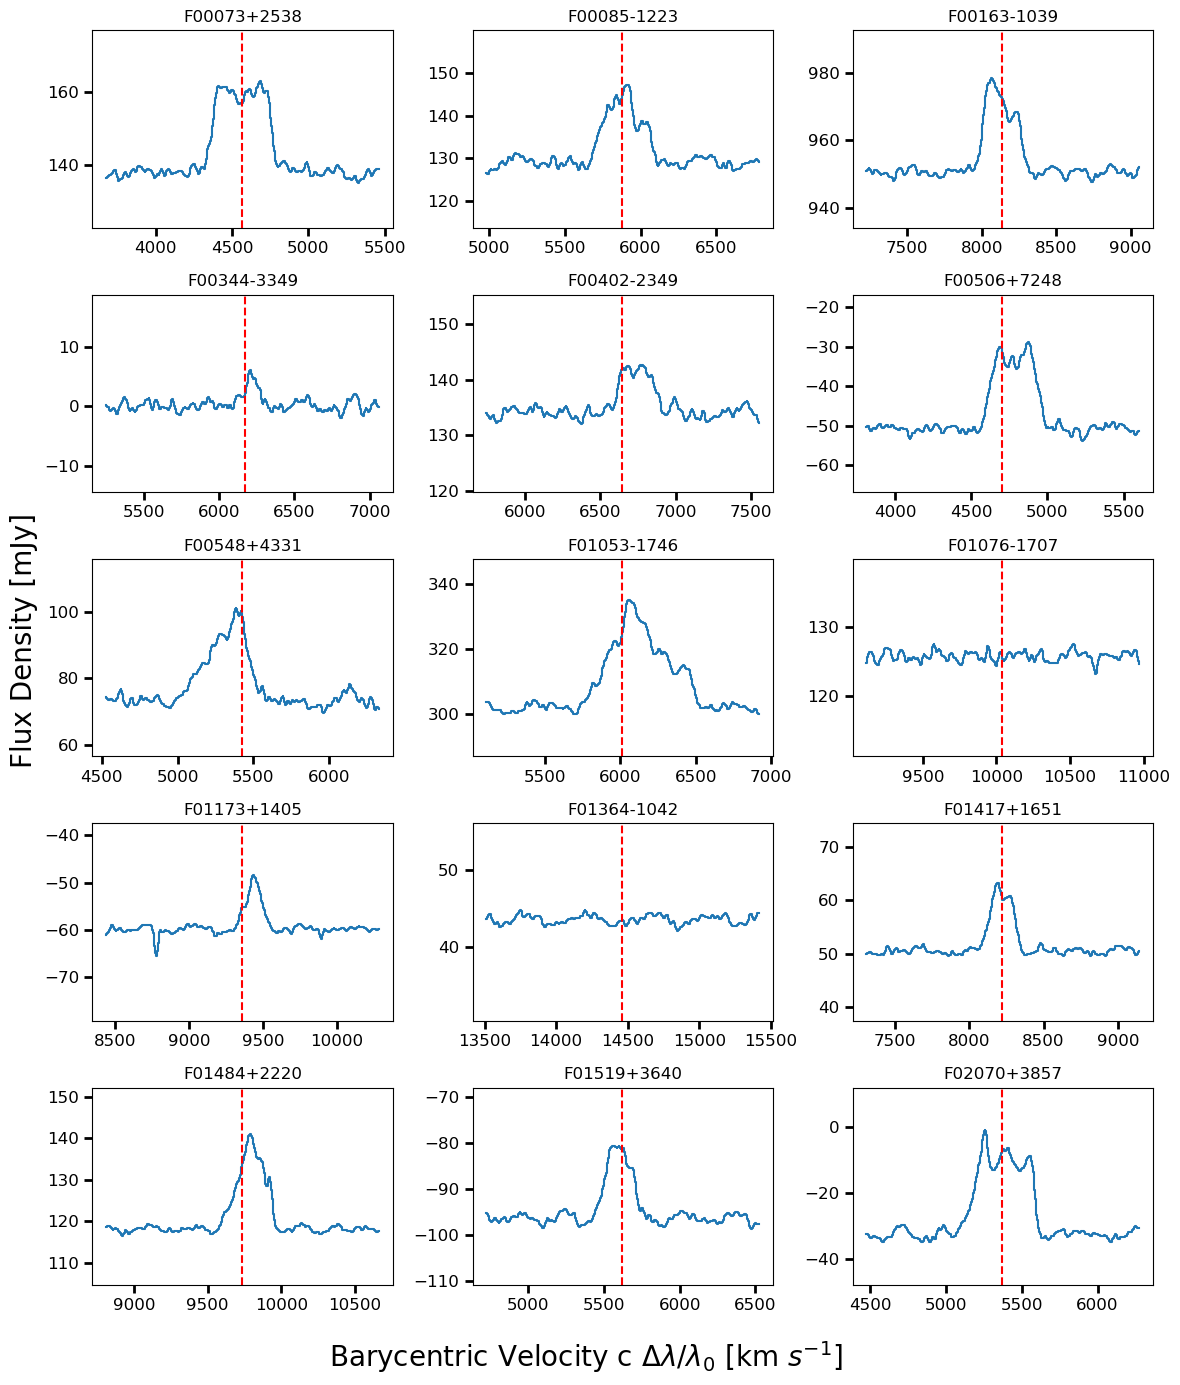

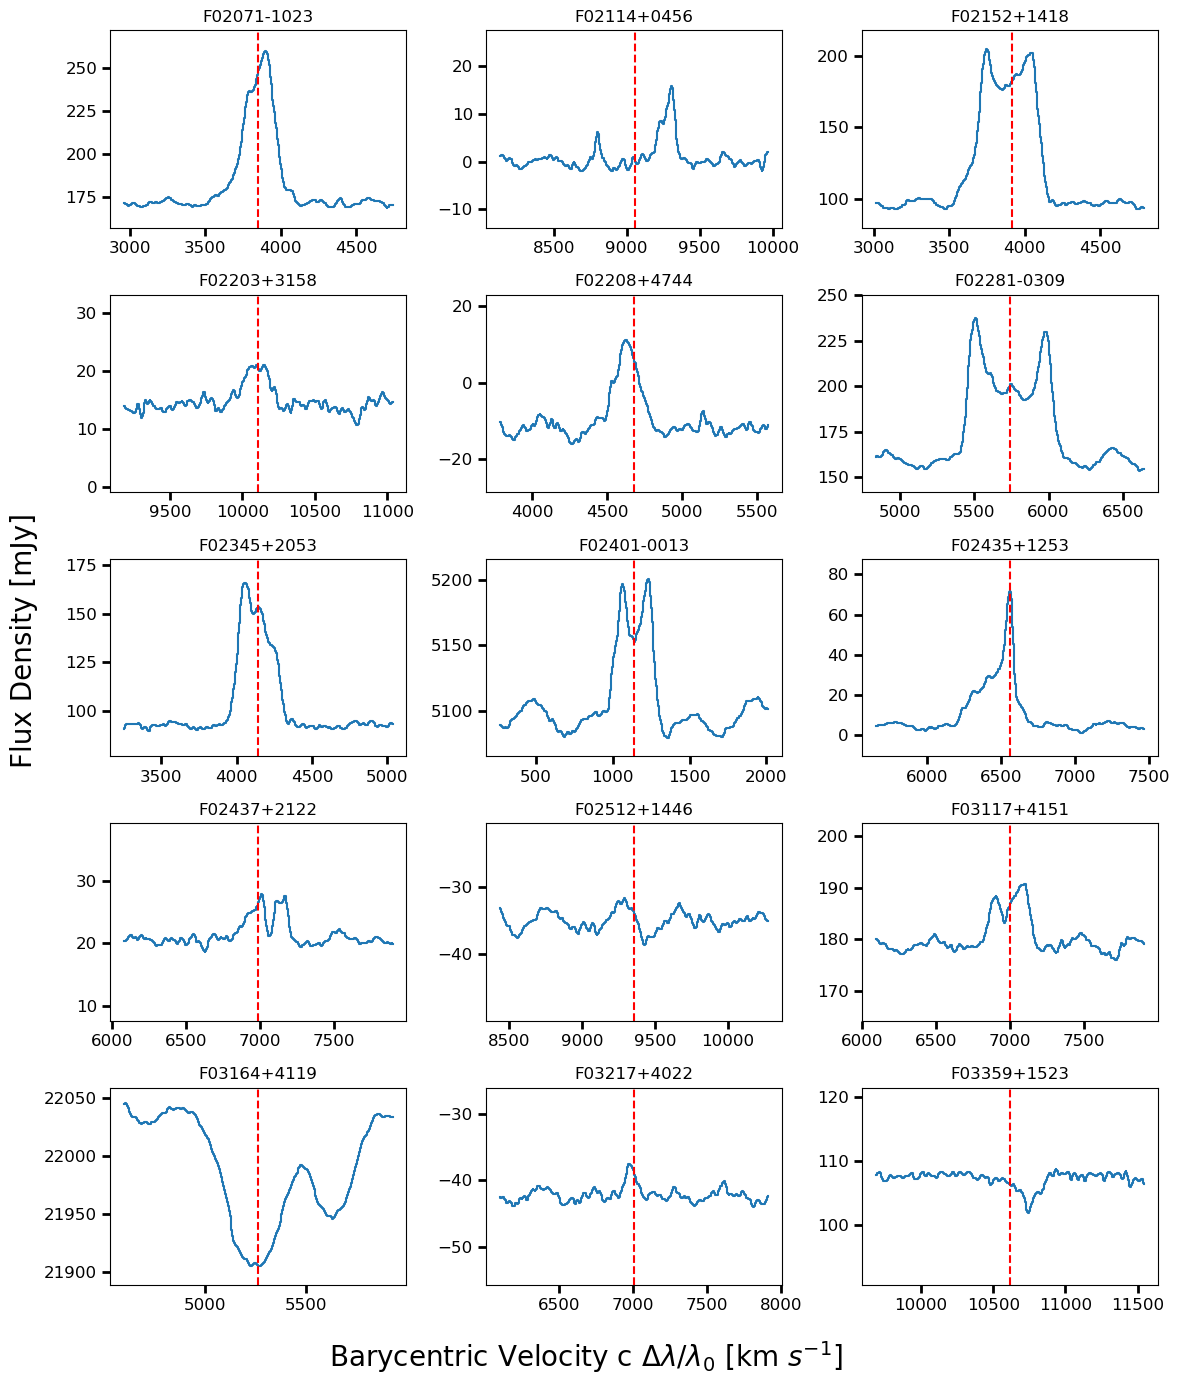

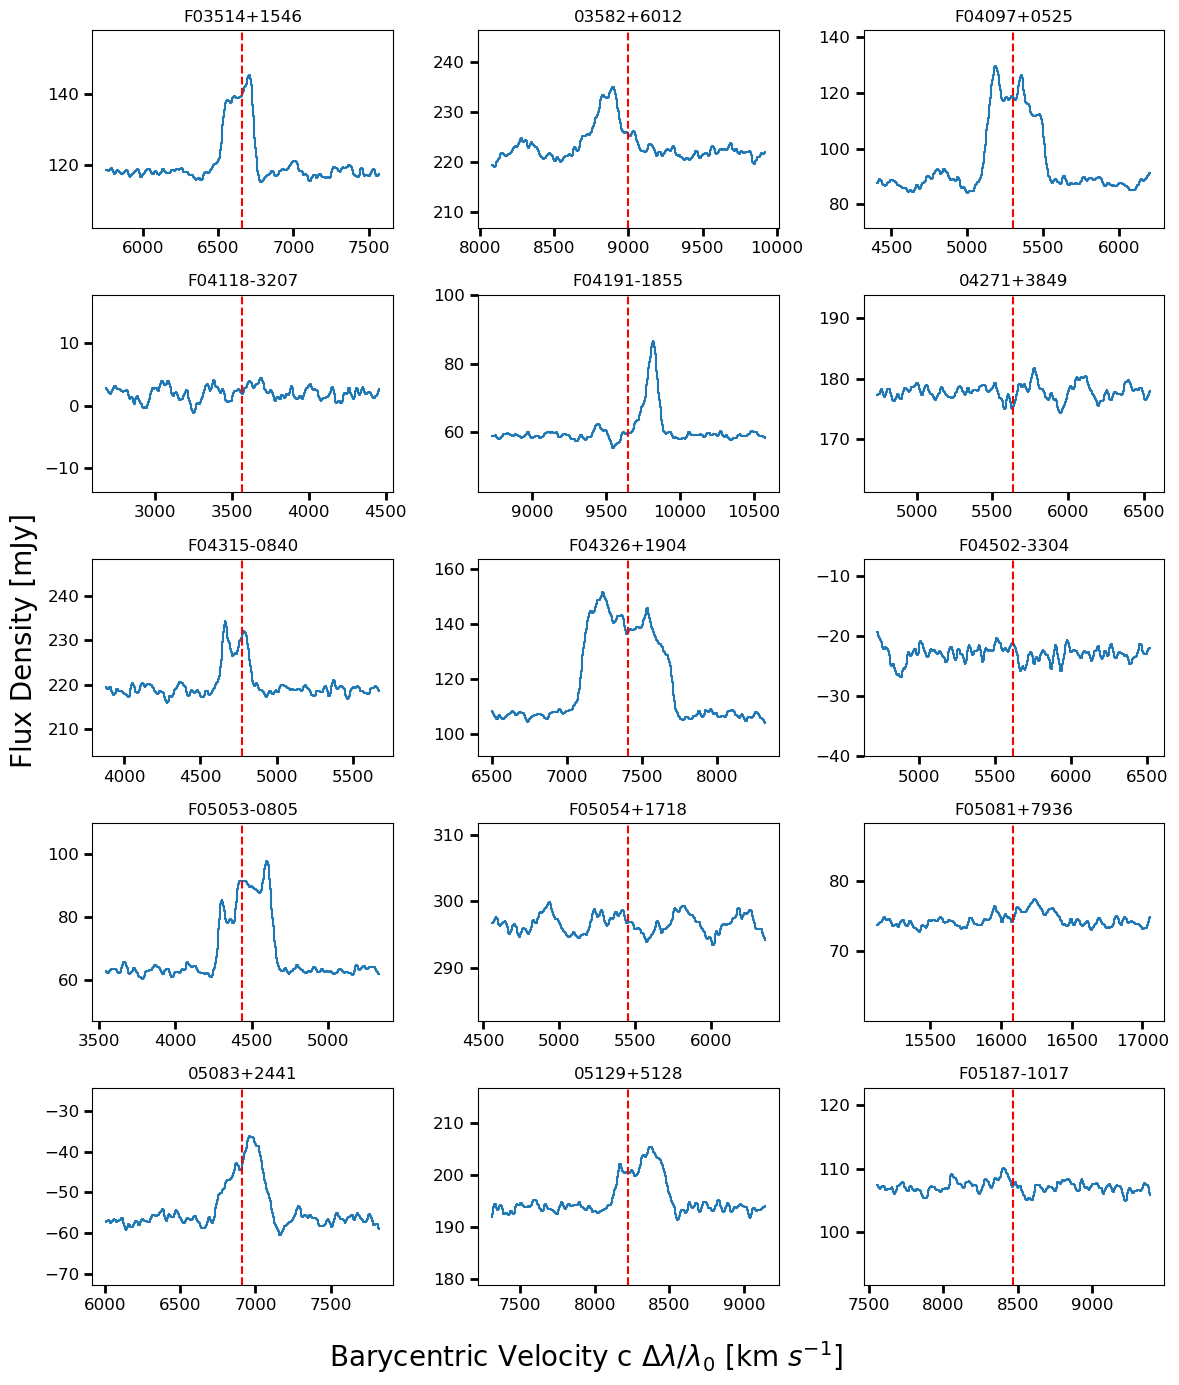

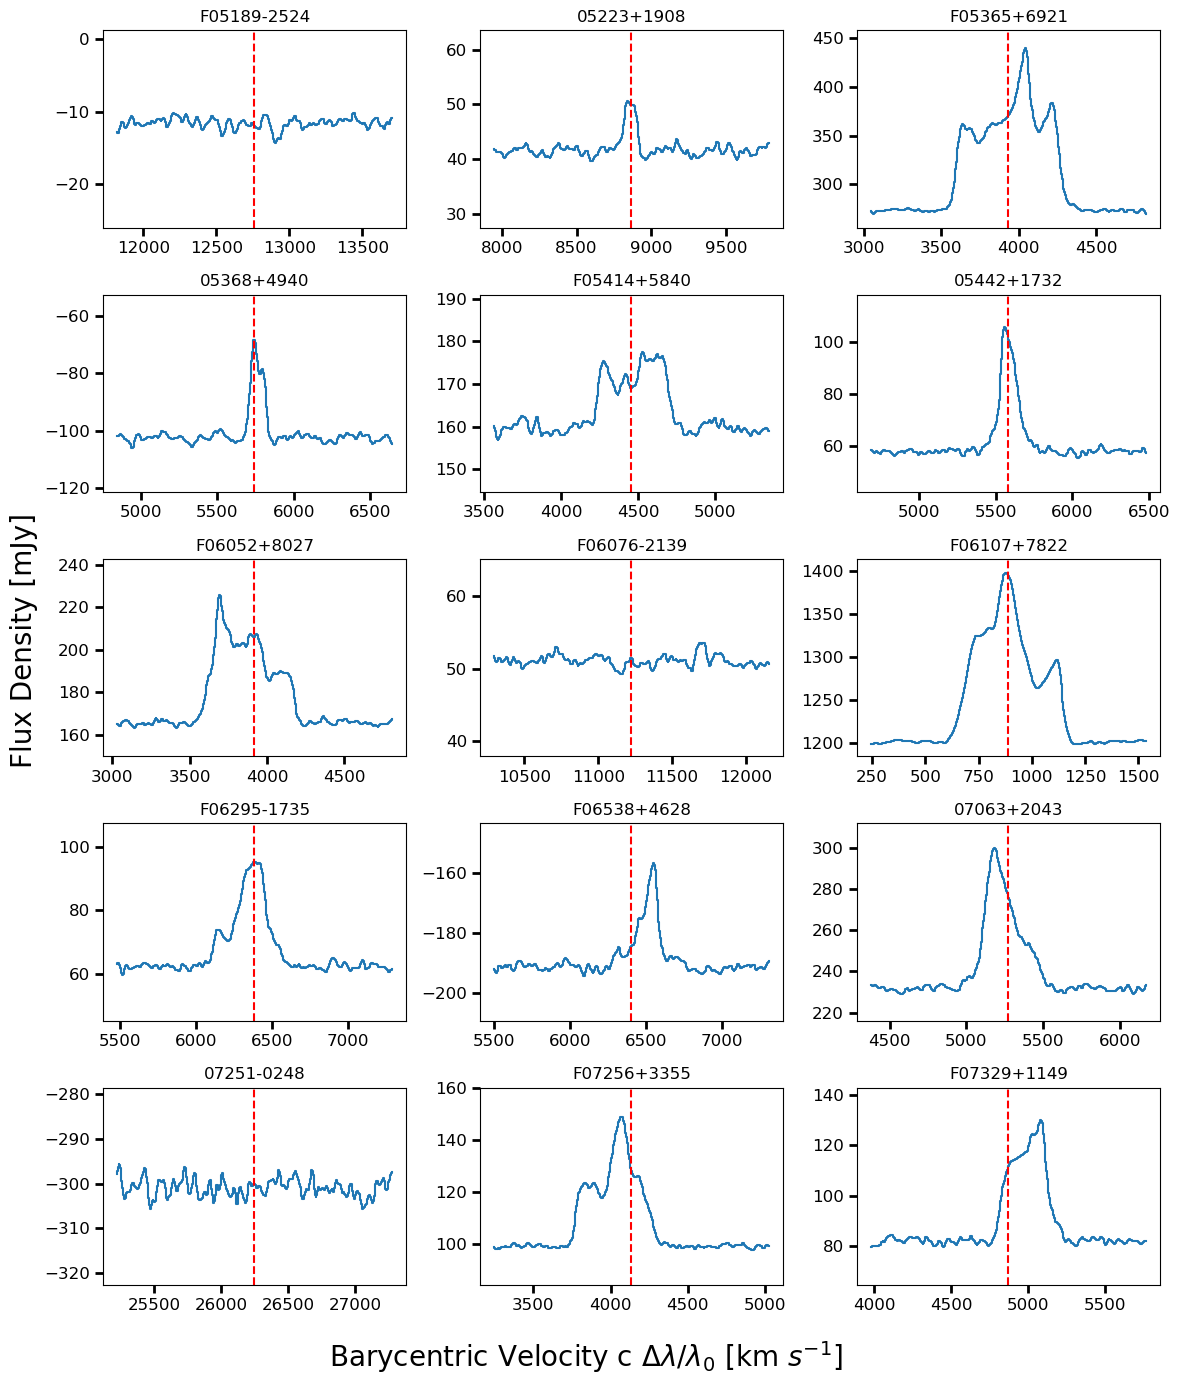

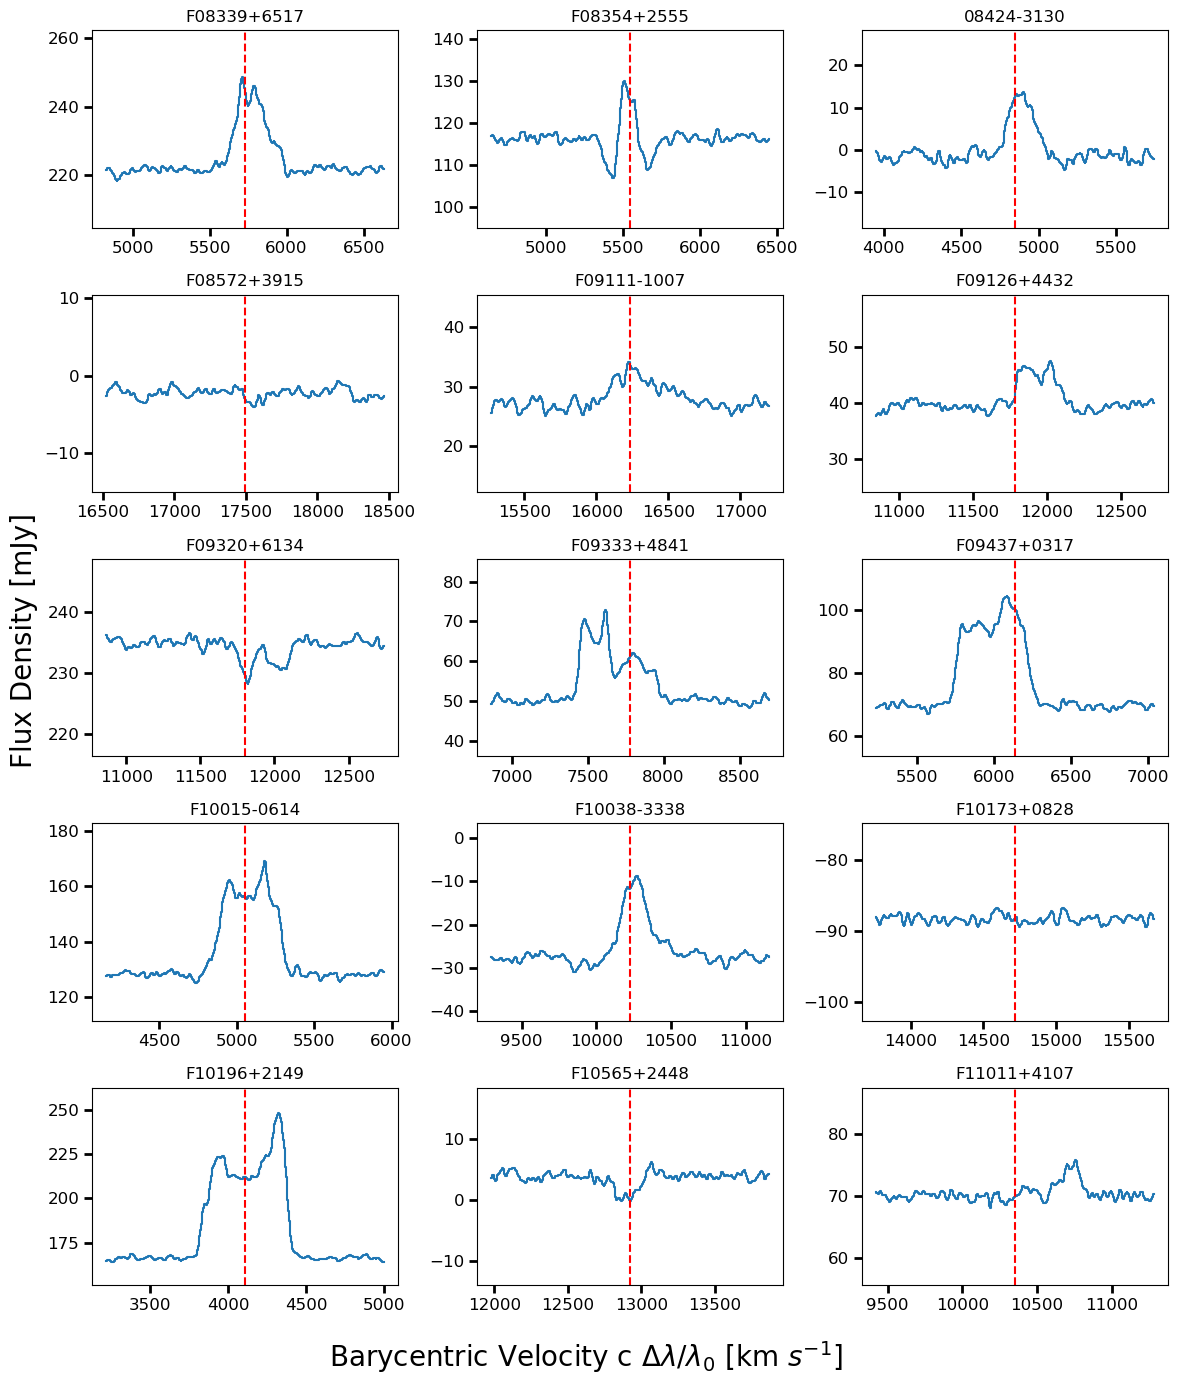

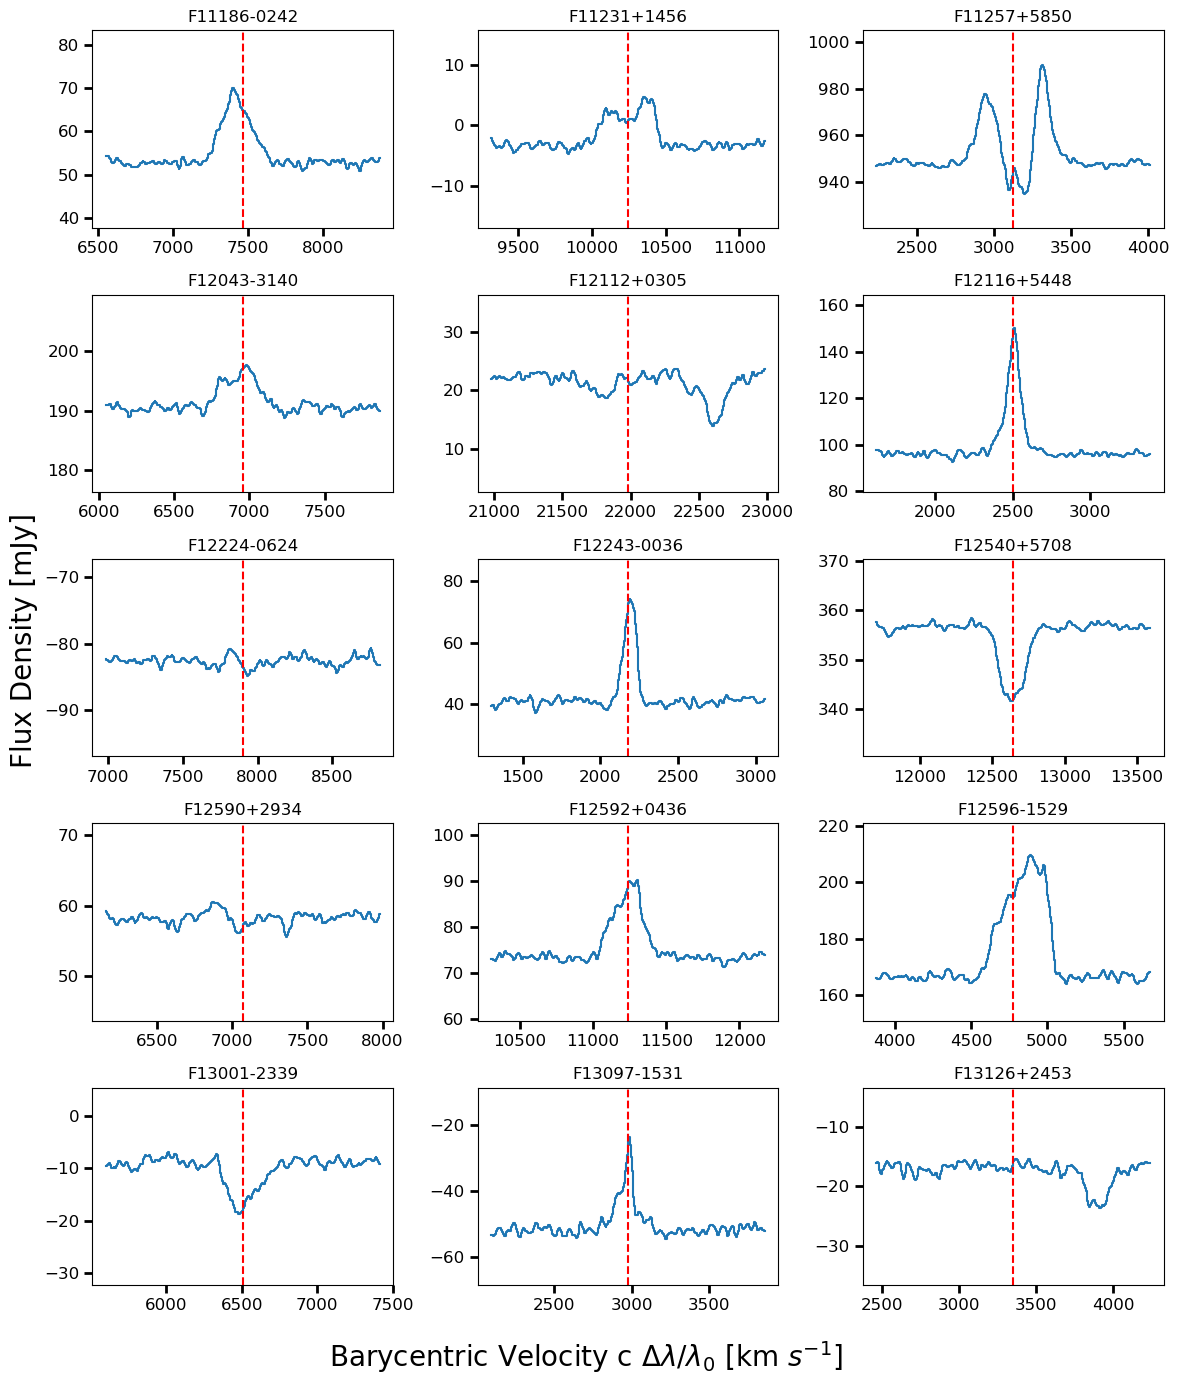

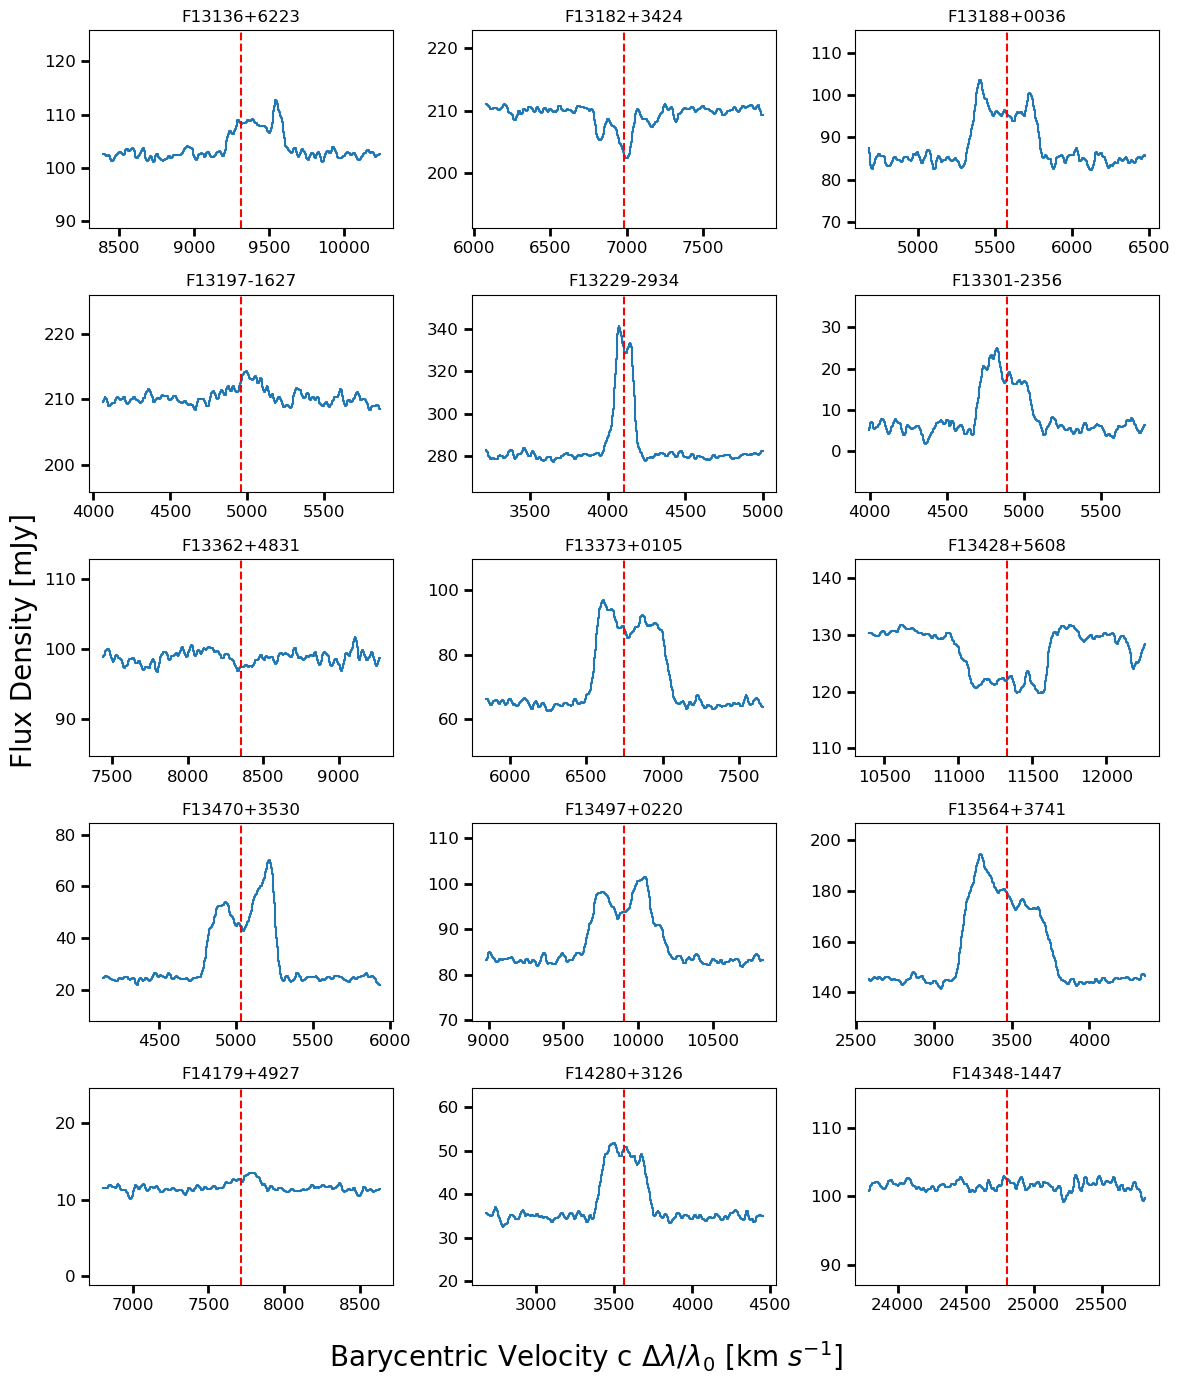

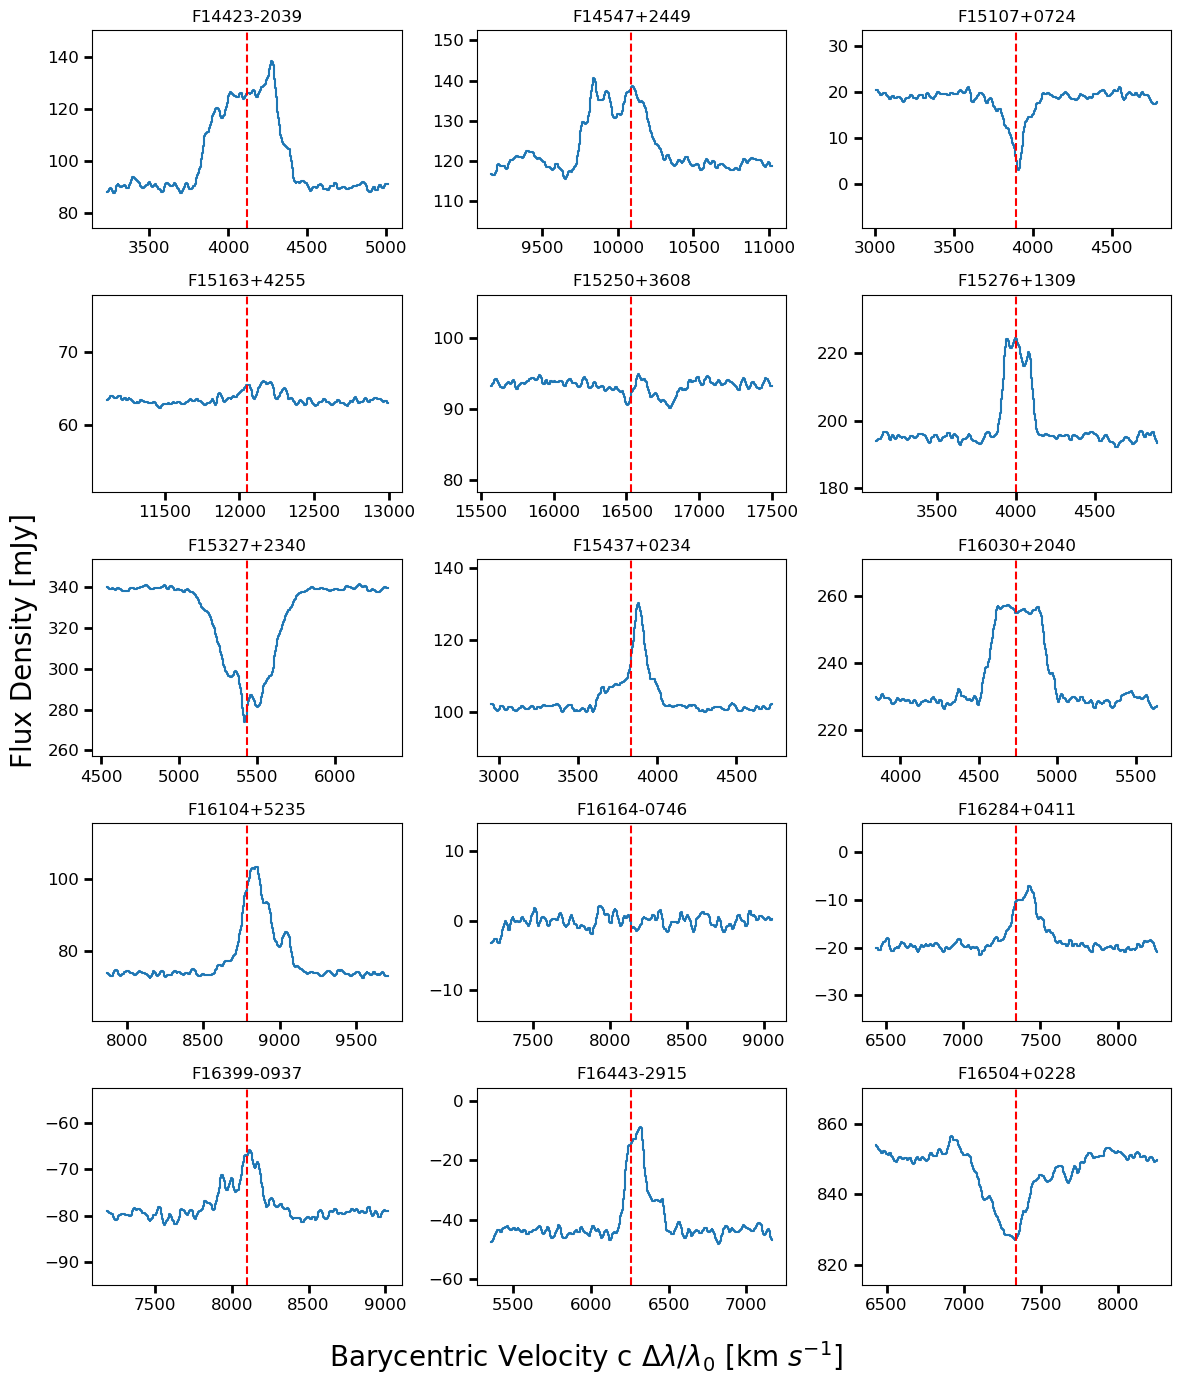

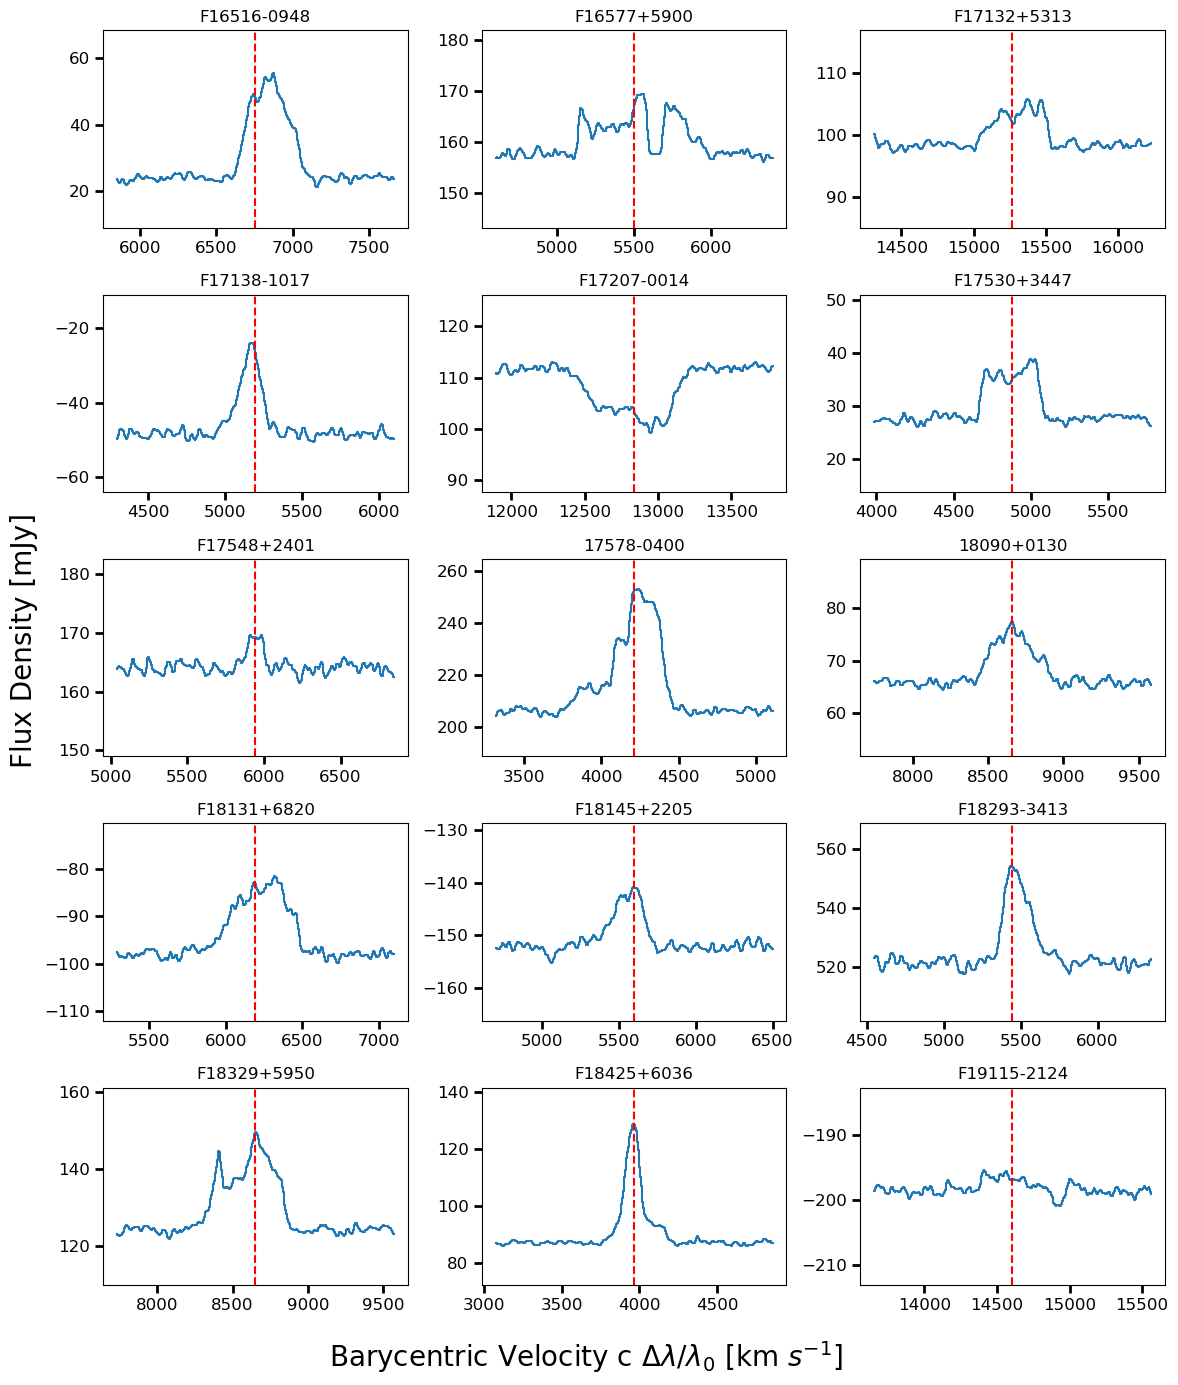

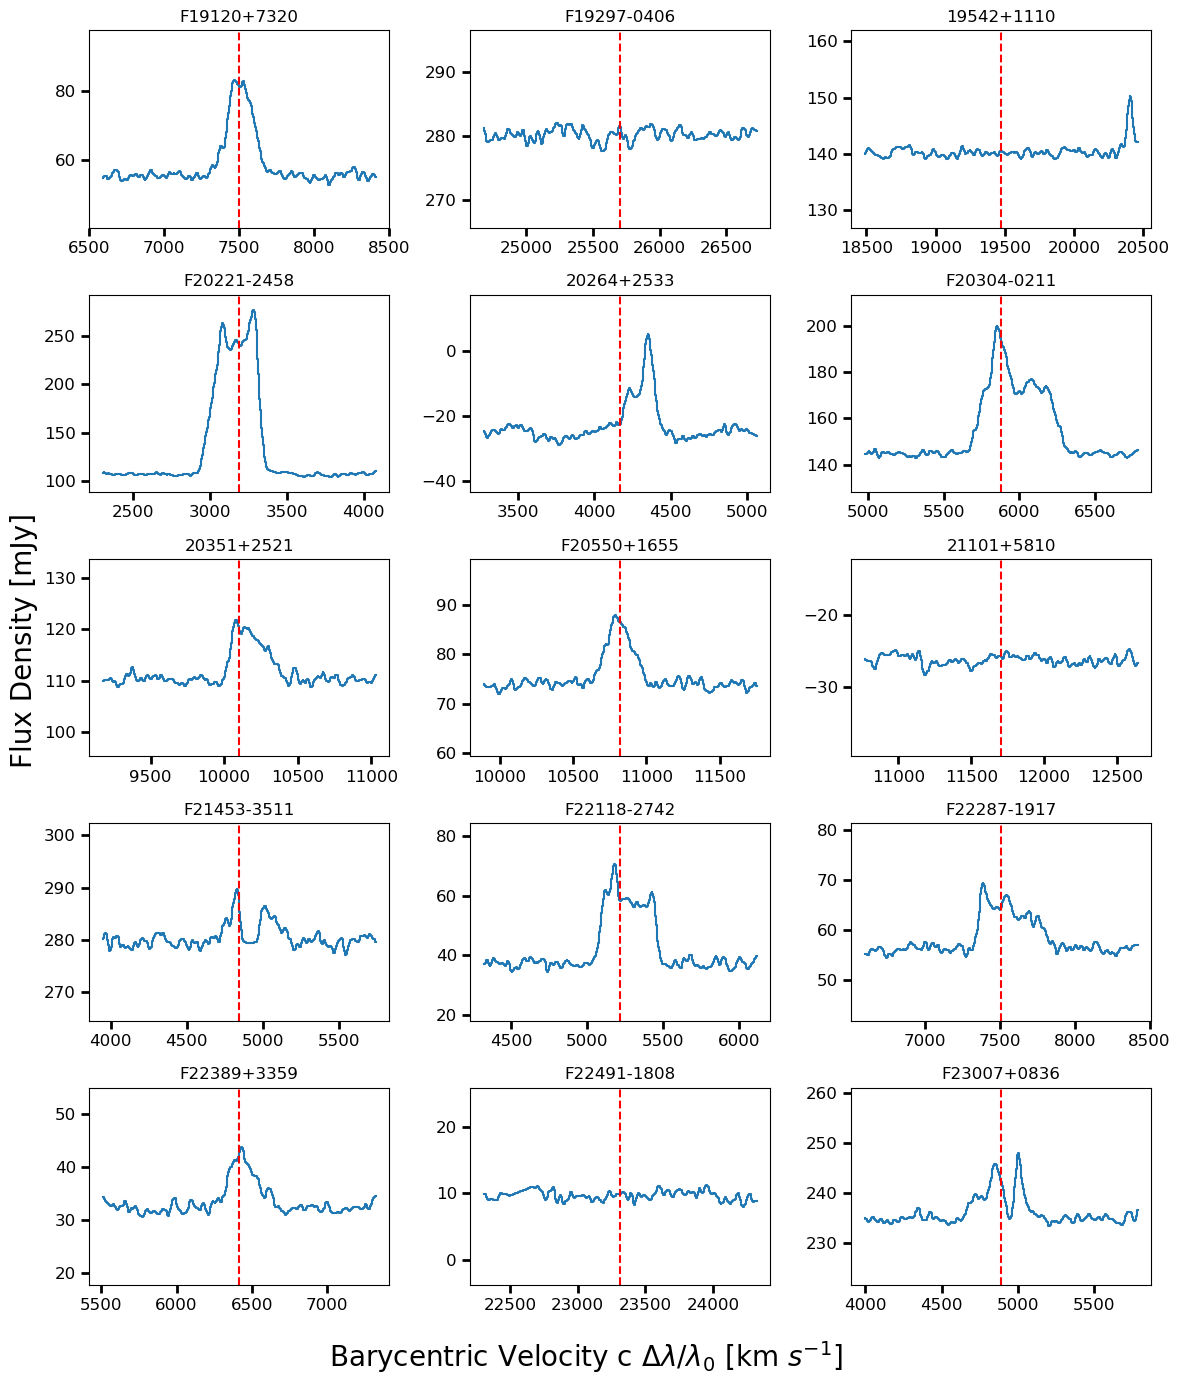

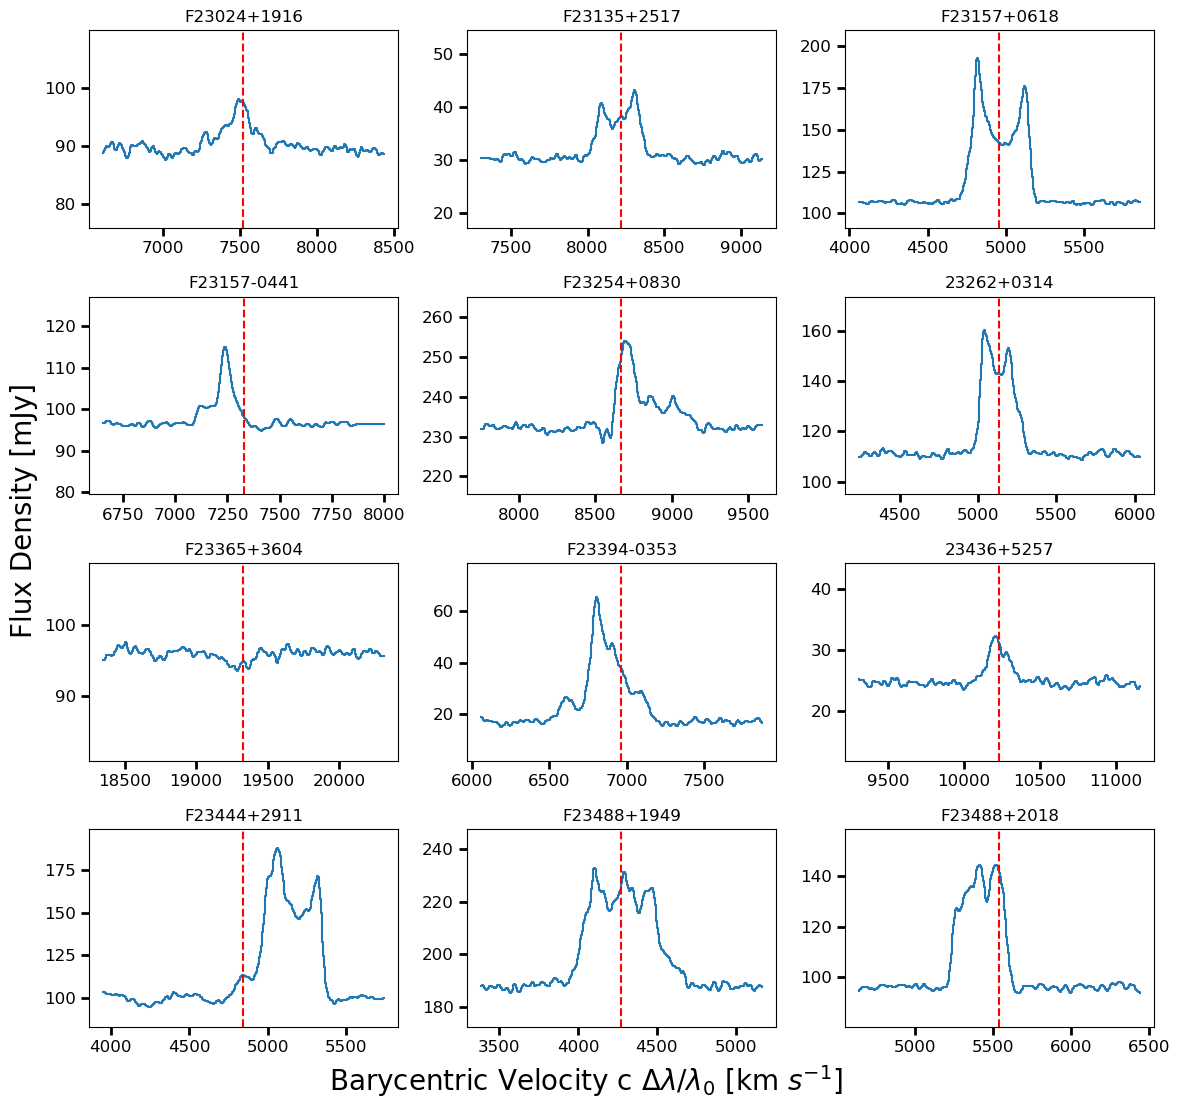

In [5]:
txt_files = sorted([f for f in os.listdir(folder_path + 'DATAv2') if f.endswith('.txt')])
valid_files = []
valid_data = []
name = []
# Load and filter valid 2-column txts
for filename in txt_files:
    path = os.path.join(folder_path + 'DATAv2', filename)
    try:
        df = pd.read_csv(path, sep='\s+', skiprows=3, header=None)
        if df.shape[1] == 2:
            valid_files.append(filename)
            valid_data.append(df)
    except Exception as e:
        print(f"Skipping {filename}: {e}")

# Plot in batches of 15 (3 columns × 5 rows)
batch_size = 15
total = len(valid_files)
print(total)
num_batches = math.ceil(total / batch_size)

for b in range(num_batches):
    start = b * batch_size
    end = min(start + batch_size, total)
    batch_files = valid_files[start:end]
    batch_data = valid_data[start:end]

    n = len(batch_files)
    cols = 3
    rows = 5  # fixed 3x5 grid
    if b == num_batches - 1:
        rows = 4
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
    axes = axes.flatten()

    for i in range(n):
        for k in df4.Name:
            if k in batch_files[i]:
                name = k
                break
        if 'F03164+4119' in batch_files[i] or 'F23157-0441' in batch_files[i] or 'F06107+7822' in batch_files[i]:

            begin = 150
            stop = -150
        else:
            begin = 100
            stop = -100
        ax = axes[i]
        ax.plot(batch_data[i][0][begin:stop] , gaussian_filter1d(batch_data[i][1][begin:stop],2) * 1000, drawstyle='steps-mid')
        ax.set_ylim(np.min(batch_data[i][1][begin:stop] * 1000) - 10, np.max(batch_data[i][1][begin:stop] * 1000) + 10)
        ax.set_title(k)
        ax.tick_params(axis='both', which='both', length=6, width=2, labelsize=12)
        for j in df2.Name:
            if j in batch_files[i]:
                ax.axvline(x=df2.loc[df2.Name == j, 'Velocity'].values[0], color='r', linestyle='--')
                break
            elif j == 'F03164+4119' and j in batch_files[i]:
                ax.axvline(x=5261, color='r', linestyle='--')
                break
        

    # Hide unused subplots in the final (partial) batch
    for j in range(n, len(axes)):
        fig.delaxes(axes[j])

    # Shared labels and title
    fig.supxlabel(r'Barycentric Velocity c $\Delta\lambda / \lambda_0$ [km $s^{-1}$]', fontsize=20)
    fig.supylabel('Flux Density [mJy]', fontsize=20)

    # Layout adjustments
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])   # Leaves space for suptitle and xlabel

    
    fig.subplots_adjust(bottom=0.07)             # Pushes xlabel closer to subplots

    plt.show()
    plt.close(fig)  # Frees memory, prevents layout bleed across figures

In [10]:
v5df = pd.read_csv(folder_path + 'goals_v5.csv', skiprows=None)
v5df.columns

Index(['name', 'Dlum[Mpc]', 'log(Lir)', 'obsFName', 'fit', 'OptVel[km/s]',
       'int_time', 'line[Jykm/s]', 'peak', 'ch1', 'ch2', 'continuumLevel',
       'RMS[mJy]', '50L', '50Lerr', 'w50', 'w50err', '50centerVel',
       '50centVelErr', '20L', '20Lerr', 'w20', 'w20err', '20centerVel',
       '20centVelErr'],
      dtype='object')

In [11]:
meas_v1df = pd.read_csv(folder_path + 'TABmeas_v1.csv', skiprows=None)
meas_v1df.columns

Index(['name', 'int_time', 'S_HISign', 'S_HI', 'S_HIErr', 'HI_Vel',
       'HI_VelErr', 'W50', 'W50Err', 'W20', 'W20Err', 'CFDSign', 'CFD',
       'CFDErr', 'CPSSign', 'CPS', 'CRMS', 'MassSign', 'Log(M_HI)',
       'LogM_HIErr', 'ProfileCode'],
      dtype='object')

In [19]:
#print(meas_v1df['Log(M_HI)'])

logLir = df1['LOG(Lir)']
Lir = np.power(10, logLir) # Convert log Lir to Lir
dist = df1.Dl
SHI = df1['S(HI)']
SHIErr = df1.Err
velocity = df1.Vel

c = 299792.458 #km/s

z = velocity / c  # Convert velocity to redshift

percent_error = 0.1

M_h1 = (2.36e5/(1+z)**2) * SHI * dist**2

logM = np.log10(M_h1)  # Convert M_h1 to log scale



diff = logM - meas_v1df['Log(M_HI)']

print(np.argmax(diff))

print(logM[33])

print(meas_v1df['Log(M_HI)'][33])



33
10.041132697827827
9.17


/home/scratch/gbosdd/conda/envs/student-rhel8/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
